In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
manado = pd.read_csv('MANADO CSV - Sheet1.csv')

In [2]:
manado.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2000-01-01 0:00:00,18.0,28.4,22.3,90.0,0.0,6.0,5.0,180.0,4.0,N
1,2000-01-02 0:00:00,19.0,28.2,22.6,88.0,0.0,2.6,6.0,360.0,3.0,N
2,2000-01-03 0:00:00,18.0,28.4,22.0,87.0,0.0,7.9,4.0,90.0,3.0,E
3,2000-01-04 0:00:00,18.0,28.4,22.6,87.0,0.0,6.9,5.0,90.0,3.0,E
4,2000-01-05 0:00:00,19.0,28.7,23.2,85.0,30.0,8.0,4.0,90.0,3.0,E


In [3]:
manado.tail()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3649,2009-12-27 0:00:00,19.0,27.6,22.8,90.0,0.0,8.0,6.0,360.0,1.0,N
3650,2009-12-28 0:00:00,20.0,24.8,22.2,94.0,8888.0,0.0,6.0,360.0,1.0,N
3651,2009-12-29 0:00:00,21.0,25.4,22.2,93.0,7.0,0.7,3.0,360.0,1.0,N
3652,2009-12-30 0:00:00,21.0,27.2,23.1,92.0,8888.0,2.5,3.0,360.0,1.0,N
3653,2009-12-31 0:00:00,19.0,26.8,22.0,93.0,0.0,3.9,3.0,360.0,0.0,N


In [4]:
manado.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3637.000000,3653.000000,3653.000000,3653.000000
mean,19.230495,27.383192,22.534328,89.692308,940.775801,3.639978,5.208048,249.162332,1.744046
std,1.290916,1.313689,0.815468,4.332313,2724.197749,2.490912,2.713394,85.063256,1.811464
min,14.000000,21.900000,17.800000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,26.600000,22.000000,88.000000,0.000000,1.400000,3.000000,180.000000,0.000000
50%,19.000000,27.400000,22.500000,90.000000,2.000000,3.600000,4.000000,180.000000,1.000000
75%,20.000000,28.300000,23.100000,93.000000,14.000000,5.700000,6.000000,360.000000,2.000000
max,24.000000,32.200000,25.400000,98.000000,8888.000000,8.000000,24.000000,360.000000,14.000000


In [5]:
print('Jumlah sampel = ', manado.shape[0])
print('Jumlah variabel (kolom) = ', manado.shape[1])

Jumlah sampel =  3654
Jumlah variabel (kolom) =  11


In [6]:
manado.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3637.000000,3653.000000,3653.000000,3653.000000
mean,19.230495,27.383192,22.534328,89.692308,940.775801,3.639978,5.208048,249.162332,1.744046
std,1.290916,1.313689,0.815468,4.332313,2724.197749,2.490912,2.713394,85.063256,1.811464
min,14.000000,21.900000,17.800000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,26.600000,22.000000,88.000000,0.000000,1.400000,3.000000,180.000000,0.000000
50%,19.000000,27.400000,22.500000,90.000000,2.000000,3.600000,4.000000,180.000000,1.000000
75%,20.000000,28.300000,23.100000,93.000000,14.000000,5.700000,6.000000,360.000000,2.000000
max,24.000000,32.200000,25.400000,98.000000,8888.000000,8.000000,24.000000,360.000000,14.000000


In [7]:
manado.columns

Index(['Date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

In [8]:
manado.shape

(3654, 11)

In [9]:
manado.isna().sum()/len(manado)*100

Date       0.000000
Tn         0.027367
Tx         0.027367
Tavg       0.027367
RH_avg     0.027367
RR         0.027367
ss         0.465244
ff_x       0.027367
ddd_x      0.027367
ff_avg     0.027367
ddd_car    0.082102
dtype: float64

In [10]:
manado = manado.ffill()
manado = manado.bfill()

In [11]:
manado.isna().sum()/len(manado)*100

Date       0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64

In [12]:
manado['Tahun'] = pd.DatetimeIndex(manado['Date']).year
manado['Bulan'] = pd.DatetimeIndex(manado['Date']).month
manado['Hari'] = pd.DatetimeIndex(manado['Date']).day

In [13]:
manado.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Tahun,Bulan,Hari
0,2000-01-01 0:00:00,18.0,28.4,22.3,90.0,0.0,6.0,5.0,180.0,4.0,N,2000,1,1
1,2000-01-02 0:00:00,19.0,28.2,22.6,88.0,0.0,2.6,6.0,360.0,3.0,N,2000,1,2
2,2000-01-03 0:00:00,18.0,28.4,22.0,87.0,0.0,7.9,4.0,90.0,3.0,E,2000,1,3
3,2000-01-04 0:00:00,18.0,28.4,22.6,87.0,0.0,6.9,5.0,90.0,3.0,E,2000,1,4
4,2000-01-05 0:00:00,19.0,28.7,23.2,85.0,30.0,8.0,4.0,90.0,3.0,E,2000,1,5


In [14]:
manado['Tahun'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
      dtype=int32)

Text(0.5, 1.0, 'Grafik Tn')

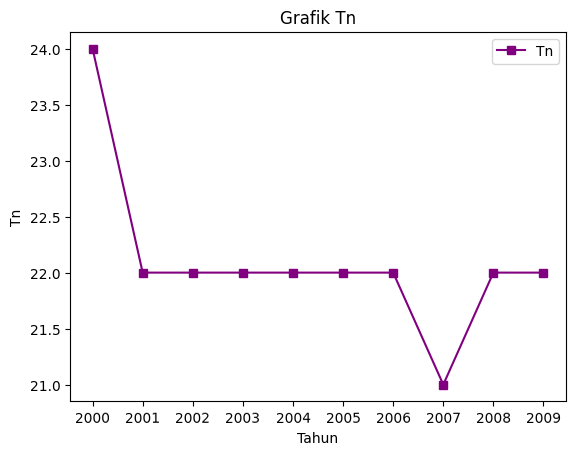

In [15]:
var = 'Tn'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'purple')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik Tx')

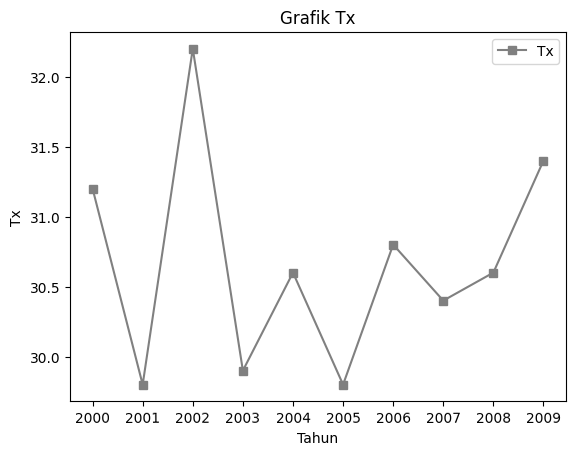

In [16]:
var = 'Tx'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'grey')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik Tavg')

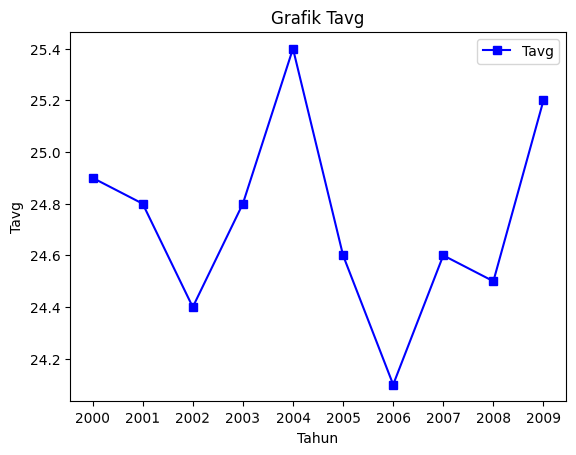

In [17]:
var = 'Tavg'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'blue')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik RH_avg')

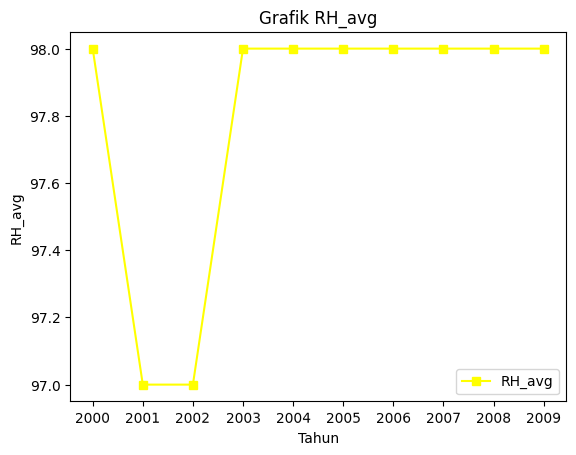

In [18]:
var = 'RH_avg'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'yellow')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik RR')

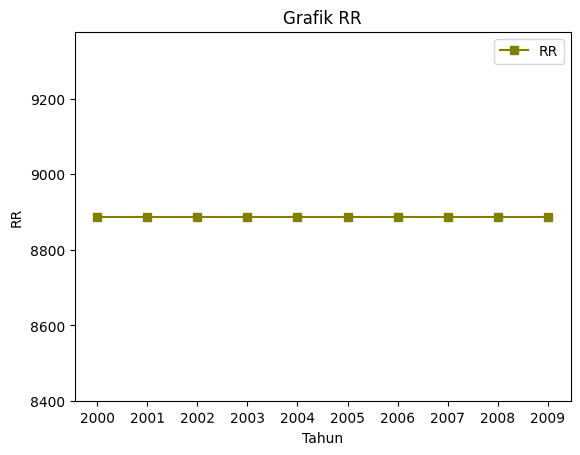

In [19]:
var = 'RR'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'olive')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ss')

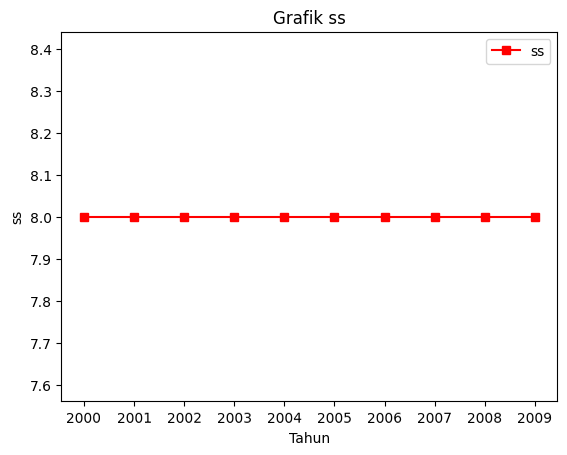

In [20]:
var = 'ss'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'red')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ff_x')

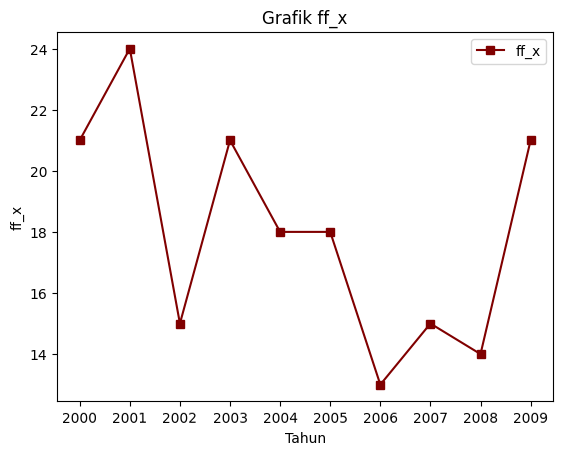

In [21]:
var = 'ff_x'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'maroon')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ddd_x')

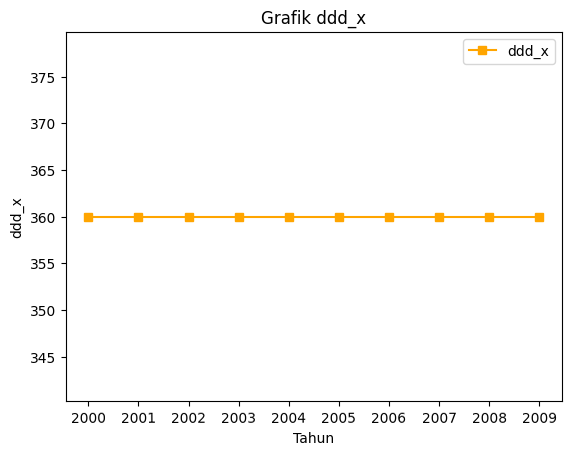

In [22]:
var = 'ddd_x'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'orange')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ff_avg')

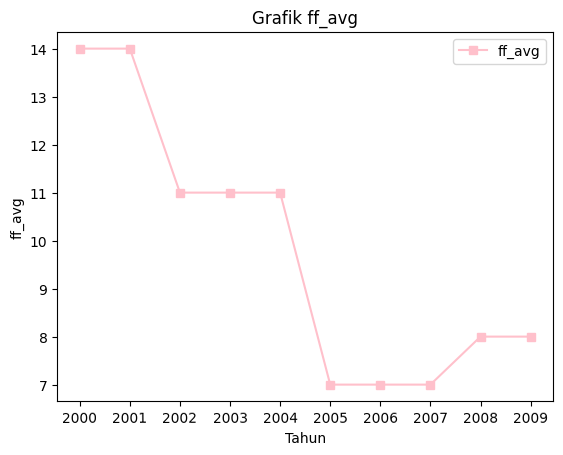

In [23]:
var = 'ff_avg'
manado.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'pink')
plt.ylabel(var)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], rotation=0.5)
plt.xlabel('Tahun')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik Tn')

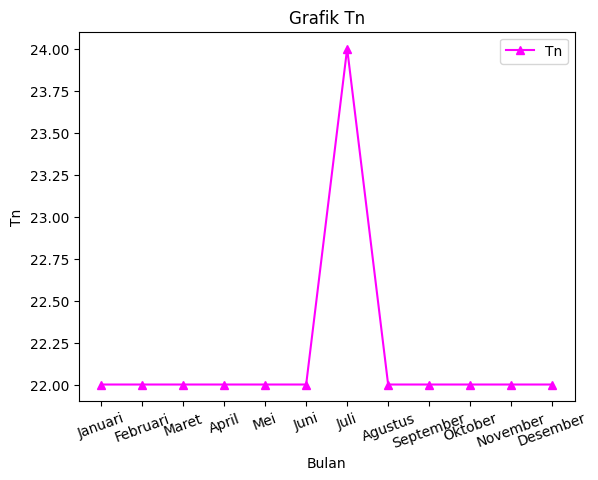

In [24]:
var = 'Tn'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'magenta')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik Tx')

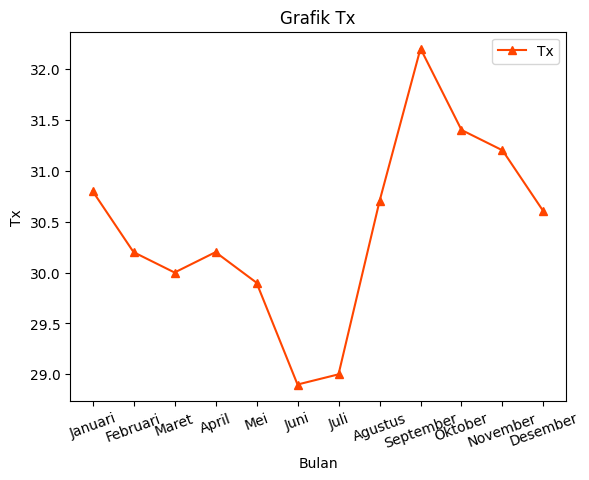

In [25]:
var = 'Tx'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'orangered')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik Tavg')

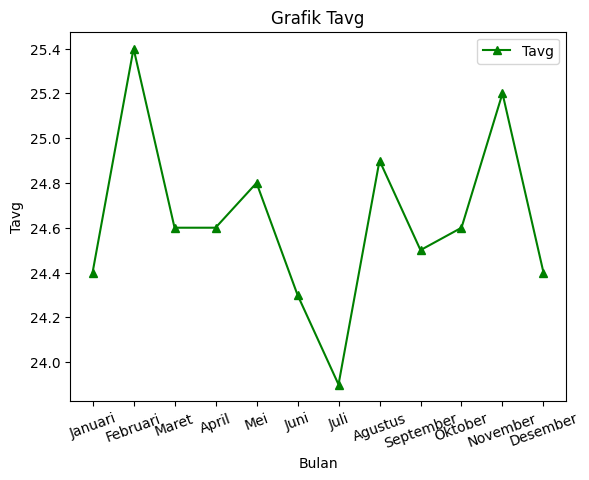

In [26]:
var = 'Tavg'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'green')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik RH_avg')

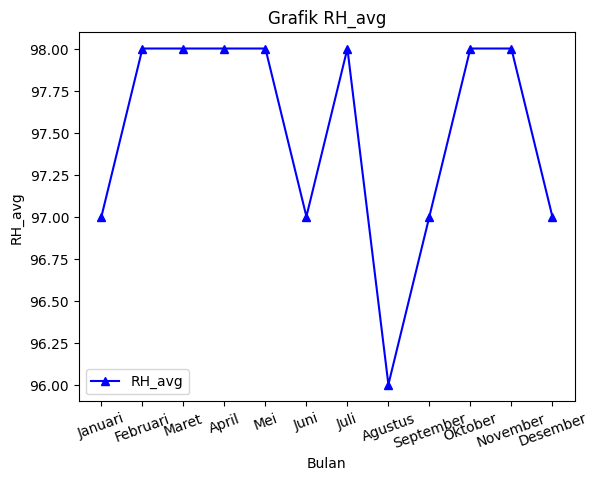

In [27]:
var = 'RH_avg'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'blue')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik RR')

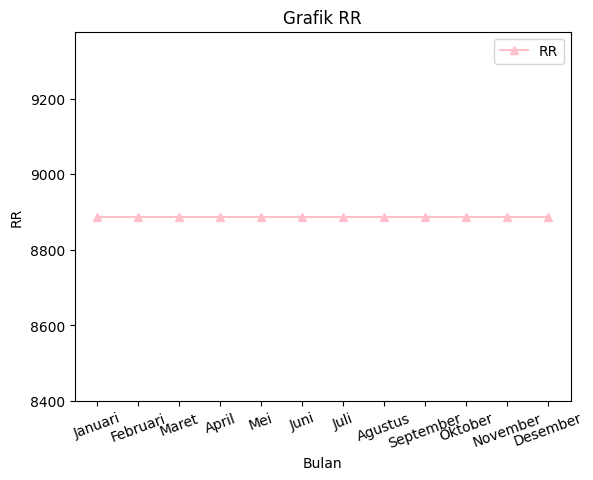

In [28]:
var = 'RR'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'pink')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ss')

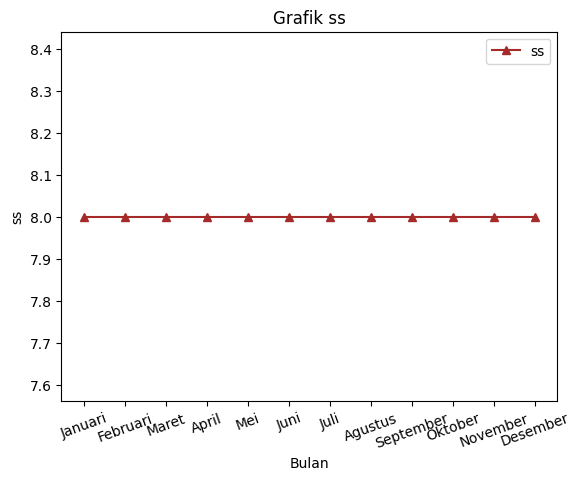

In [29]:
var = 'ss'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'brown')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ff_x')

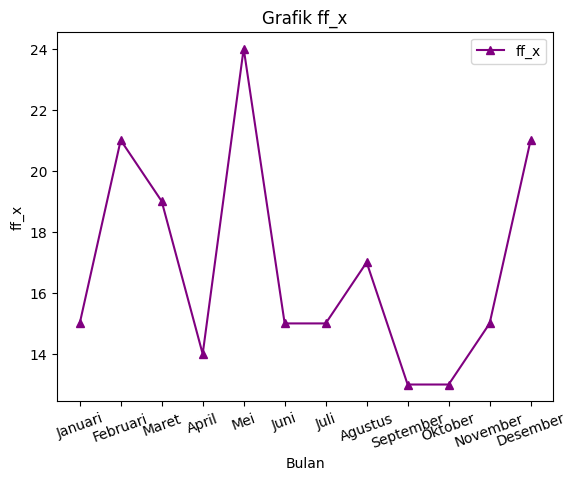

In [30]:
var = 'ff_x'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'purple')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ddd_x')

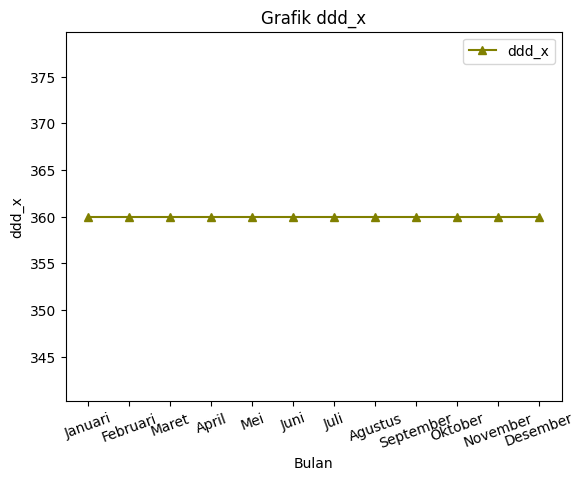

In [31]:
var = 'ddd_x'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'olive')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

Text(0.5, 1.0, 'Grafik ff_avg')

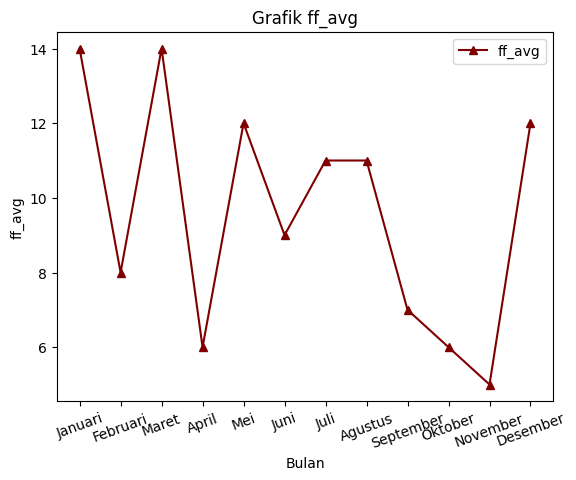

In [32]:
var = 'ff_avg'
manado.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'maroon')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=20)
plt.xlabel('Bulan')
plt.title('Grafik '+var)

In [33]:
import seaborn as sns
from sklearn import linear_model

In [34]:
regY= linear_model.LinearRegression()
regY.fit(manado["Tn"].to_numpy().reshape(-1,1), manado["ss"])

LinearRegression()

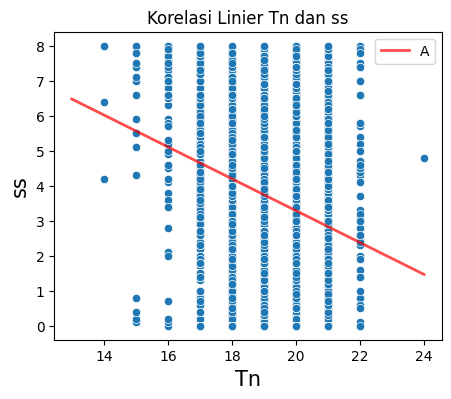

In [35]:
plt.figure(figsize=(5, 4), dpi=100)
ax = sns.scatterplot(x='Tn', y='ss', data=manado, marker='o')
ax.set_xlabel('Tn', fontsize=15)
ax.set_ylabel('ss', fontsize=15, rotation=90)
plt.title('Korelasi Linier Tn dan ss')

min = manado['Tn'].min()-1
max = manado['Tn'].max()+1

model = regY.predict(np.arange(min,max).reshape(-1, 1))
ax= sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)